In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler    

import torchvision
from torchvision import datasets,transforms 

In [2]:
# import zipfile
# with zipfile.ZipFile("face_data.zip","r") as zip_ref:
#     zip_ref.extractall("./")
# with zipfile.ZipFile("face_test.zip","r") as zip_ref:
#     zip_ref.extractall("./")

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

In [5]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [6]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [7]:
train_dir = 'face_data/train/'
test_dir = 'face_data/val/'

In [8]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform)

In [9]:
train_data

Dataset ImageFolder
    Number of datapoints: 21
    Root location: face_data/train/
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4,
                                           shuffle=True, num_workers=4)

In [11]:
test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transform)

In [12]:
test_data

Dataset ImageFolder
    Number of datapoints: 6
    Root location: face_data/val/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [13]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8,
                                          shuffle=True, num_workers=4)

In [14]:
dataloaders = {
    'train': train_loader,
    'test': test_loader
}

In [15]:
class_names = train_data.classes

print(class_names)
print(len(class_names))

['guillaume_olivier', 'jeandri_olivier', 'lorraine_olivier']
3


In [16]:
def imshow(inp, title):

    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure (figsize = (12, 6))

    plt.imshow(inp)
    plt.title(title)
    plt.pause(2)

In [17]:
inputs, classes = next(iter(dataloaders['train']))

In [18]:
out = torchvision.utils.make_grid(inputs)

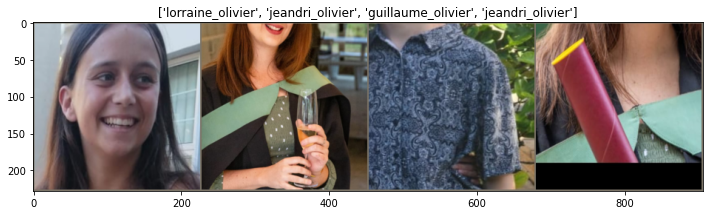

In [19]:
imshow(out, title=[class_names[x] for x in classes])

In [20]:
from torchvision import models

model = models.alexnet(pretrained=True)

In [21]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
num_ftrs = model.classifier[6].in_features
num_ftrs

4096

In [23]:
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))

In [24]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
criterion   = nn.CrossEntropyLoss()

optimizer   = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [26]:
import time
import copy
import os

dataset_sizes = {
    'train': len(train_data),
    'test': len(test_data)
}

In [27]:
def train_model(model, criterion, optimizer, num_epochs=500):
    since = time.time()
    FT_losses = []
    model = model.to(device)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)
    # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                FT_losses.append(loss.item())
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double()/dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.2f}%'.format(
                phase, epoch_loss, epoch_acc*100))
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, FT_losses

In [28]:
model, FT_losses = train_model(model, criterion, optimizer, num_epochs=450)

Epoch 1/450
----------
train Loss: 1.3432 Acc: 23.81%
test Loss: 1.1802 Acc: 50.00%
Epoch 2/450
----------
train Loss: 1.4864 Acc: 28.57%
test Loss: 1.6131 Acc: 50.00%
Epoch 3/450
----------
train Loss: 0.5880 Acc: 76.19%
test Loss: 2.0074 Acc: 66.67%
Epoch 4/450
----------
train Loss: 0.7611 Acc: 61.90%
test Loss: 2.0844 Acc: 16.67%
Epoch 5/450
----------
train Loss: 0.9164 Acc: 57.14%
test Loss: 3.1483 Acc: 33.33%
Epoch 6/450
----------
train Loss: 1.6039 Acc: 47.62%
test Loss: 2.6293 Acc: 16.67%
Epoch 7/450
----------
train Loss: 1.2734 Acc: 61.90%
test Loss: 1.4291 Acc: 33.33%
Epoch 8/450
----------
train Loss: 0.7702 Acc: 71.43%
test Loss: 1.4503 Acc: 33.33%
Epoch 9/450
----------
train Loss: 0.6684 Acc: 61.90%
test Loss: 1.4793 Acc: 33.33%
Epoch 10/450
----------
train Loss: 0.6998 Acc: 66.67%
test Loss: 1.6885 Acc: 50.00%
Epoch 11/450
----------
train Loss: 0.5883 Acc: 71.43%
test Loss: 1.8974 Acc: 50.00%
Epoch 12/450
----------
train Loss: 0.8749 Acc: 66.67%
test Loss: 1.9281 A

train Loss: 0.3728 Acc: 80.95%
test Loss: 0.9088 Acc: 66.67%
Epoch 98/450
----------
train Loss: 0.1974 Acc: 90.48%
test Loss: 1.0112 Acc: 33.33%
Epoch 99/450
----------
train Loss: 0.0548 Acc: 100.00%
test Loss: 1.5747 Acc: 50.00%
Epoch 100/450
----------
train Loss: 0.0928 Acc: 95.24%
test Loss: 1.8629 Acc: 50.00%
Epoch 101/450
----------
train Loss: 0.1293 Acc: 90.48%
test Loss: 2.0274 Acc: 50.00%
Epoch 102/450
----------
train Loss: 0.2494 Acc: 95.24%
test Loss: 2.2957 Acc: 33.33%
Epoch 103/450
----------
train Loss: 0.5099 Acc: 85.71%
test Loss: 2.5235 Acc: 16.67%
Epoch 104/450
----------
train Loss: 0.6122 Acc: 85.71%
test Loss: 3.1263 Acc: 50.00%
Epoch 105/450
----------
train Loss: 0.8286 Acc: 80.95%
test Loss: 1.4525 Acc: 33.33%
Epoch 106/450
----------
train Loss: 0.5755 Acc: 71.43%
test Loss: 2.5961 Acc: 33.33%
Epoch 107/450
----------
train Loss: 0.4959 Acc: 80.95%
test Loss: 1.3593 Acc: 33.33%
Epoch 108/450
----------
train Loss: 0.1815 Acc: 95.24%
test Loss: 1.4231 Acc: 5

test Loss: 1.2205 Acc: 33.33%
Epoch 193/450
----------
train Loss: 1.0285 Acc: 47.62%
test Loss: 1.2657 Acc: 33.33%
Epoch 194/450
----------
train Loss: 1.0225 Acc: 42.86%
test Loss: 1.0590 Acc: 33.33%
Epoch 195/450
----------
train Loss: 1.5810 Acc: 38.10%
test Loss: 1.1590 Acc: 0.00%
Epoch 196/450
----------
train Loss: 1.0523 Acc: 42.86%
test Loss: 1.0972 Acc: 16.67%
Epoch 197/450
----------
train Loss: 0.8432 Acc: 61.90%
test Loss: 1.1758 Acc: 33.33%
Epoch 198/450
----------
train Loss: 0.7244 Acc: 80.95%
test Loss: 1.5761 Acc: 33.33%
Epoch 199/450
----------
train Loss: 0.9604 Acc: 66.67%
test Loss: 1.6455 Acc: 16.67%
Epoch 200/450
----------
train Loss: 0.6185 Acc: 76.19%
test Loss: 2.8909 Acc: 33.33%
Epoch 201/450
----------
train Loss: 0.8450 Acc: 76.19%
test Loss: 1.1534 Acc: 33.33%
Epoch 202/450
----------
train Loss: 0.8522 Acc: 61.90%
test Loss: 1.2223 Acc: 33.33%
Epoch 203/450
----------
train Loss: 0.6985 Acc: 76.19%
test Loss: 1.0862 Acc: 16.67%
Epoch 204/450
----------


train Loss: 0.0299 Acc: 100.00%
test Loss: 3.6113 Acc: 66.67%
Epoch 289/450
----------
train Loss: 0.1138 Acc: 95.24%
test Loss: 4.6771 Acc: 66.67%
Epoch 290/450
----------
train Loss: 0.0241 Acc: 100.00%
test Loss: 4.9350 Acc: 66.67%
Epoch 291/450
----------
train Loss: 0.6017 Acc: 80.95%
test Loss: 4.4059 Acc: 50.00%
Epoch 292/450
----------
train Loss: 0.1207 Acc: 95.24%
test Loss: 0.8931 Acc: 50.00%
Epoch 293/450
----------
train Loss: 0.1675 Acc: 90.48%
test Loss: 0.7099 Acc: 50.00%
Epoch 294/450
----------
train Loss: 0.0961 Acc: 95.24%
test Loss: 0.8215 Acc: 50.00%
Epoch 295/450
----------
train Loss: 0.0571 Acc: 100.00%
test Loss: 1.5238 Acc: 66.67%
Epoch 296/450
----------
train Loss: 0.1684 Acc: 90.48%
test Loss: 2.4331 Acc: 66.67%
Epoch 297/450
----------
train Loss: 0.0208 Acc: 100.00%
test Loss: 2.4509 Acc: 66.67%
Epoch 298/450
----------
train Loss: 0.5923 Acc: 85.71%
test Loss: 2.7828 Acc: 50.00%
Epoch 299/450
----------
train Loss: 0.3651 Acc: 90.48%
test Loss: 1.1981 A

train Loss: 0.0531 Acc: 95.24%
test Loss: 2.5288 Acc: 50.00%
Epoch 384/450
----------
train Loss: 0.0351 Acc: 100.00%
test Loss: 2.7838 Acc: 50.00%
Epoch 385/450
----------
train Loss: 0.6059 Acc: 95.24%
test Loss: 4.2472 Acc: 66.67%
Epoch 386/450
----------
train Loss: 0.0784 Acc: 95.24%
test Loss: 6.1091 Acc: 66.67%
Epoch 387/450
----------
train Loss: 0.1388 Acc: 90.48%
test Loss: 3.7175 Acc: 50.00%
Epoch 388/450
----------
train Loss: 0.1503 Acc: 95.24%
test Loss: 3.9851 Acc: 50.00%
Epoch 389/450
----------
train Loss: 0.1610 Acc: 95.24%
test Loss: 3.3695 Acc: 50.00%
Epoch 390/450
----------
train Loss: 0.0527 Acc: 95.24%
test Loss: 2.6954 Acc: 50.00%
Epoch 391/450
----------
train Loss: 0.5935 Acc: 95.24%
test Loss: 2.1433 Acc: 50.00%
Epoch 392/450
----------
train Loss: 0.0564 Acc: 100.00%
test Loss: 1.6005 Acc: 66.67%
Epoch 393/450
----------
train Loss: 0.1279 Acc: 95.24%
test Loss: 1.4632 Acc: 66.67%
Epoch 394/450
----------
train Loss: 0.0398 Acc: 100.00%
test Loss: 1.6714 Ac

In [29]:
with torch.no_grad():
    
    correct = 0
    total = 0

    test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,
                             std=std)
    ])
    base_path = "face_data/val/"

    test_data = datasets.ImageFolder(root=base_path,
                                transform=test_transform)

    test_loader = torch.utils.data.DataLoader(test_data, batch_size=8,
                                          shuffle=True, num_workers=4)

    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#         print(predicted)
    print('Accuracy of the model on the test images: {}%'\
          .format(100 * correct / total))

Accuracy of the model on the test images: 83.33333333333333%


### For running the predictions without knowing the labels for a bunch of images in a folder

['WhatsApp Image 2021-05-23 at 12.53.14.jpeg', 'WhatsApp Image 2021-05-23 at 13.13.05(8).jpeg', 'WhatsApp Image 2021-05-23 at 13.26.56.jpeg']


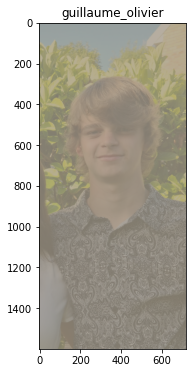

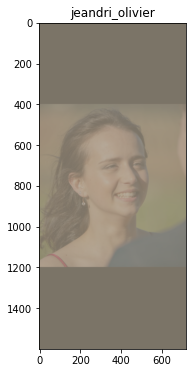

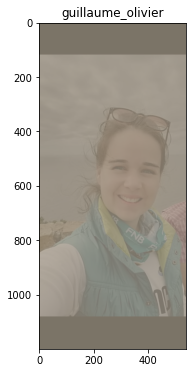

In [33]:
import glob
from PIL import Image
from torch.autograd import Variable
from os import listdir

with torch.no_grad():
    
    base_path = "./face_test/"
    correct = 0
    total = 0
    array = ['guillaume_olivier', 'jeandri_olivier', 'lorraine_olivier']

    test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,
                             std=std)
    ])
    onlyfiles = [f for f in listdir(base_path)]
    print(onlyfiles)
    for files in onlyfiles:
        images=glob.glob(base_path + files)
        for image in images:
            img = Image.open(image)
            trans = transforms.ToPILImage()
            trans1 = transforms.ToTensor()
            transformed_image = test_transform(img).float()
            transformed_image = Variable(transformed_image, requires_grad=True)
            transformed_image = transformed_image.unsqueeze(0)
    #         plt.imshow(transformed_image)
    #         print(transformed_image)
            transformed_image = transformed_image.to(device)
            outputs = model(transformed_image)
            _, predicted = torch.max(outputs.data, 1)
            predicted_index_value = predicted.cpu().numpy()[0]
#             print("Predicted image is : " +array[predicted_index_value])
            imshow(trans1(img),array[predicted_index_value])


In [34]:
# save model
torch.save(model, './model_final')

In [34]:
# import boto3
# file_name = './model_final'
# s3 = boto3.resource('s3')
# bucket='pytorch-models-face' # Replace with your s3 bucket name
# s3.meta.client.upload_file(file_name, bucket, 'final_pytorch_model')

ModuleNotFoundError: No module named 'boto3'

### Use the below code to load the model and use again to evaluate ###

In [36]:
import torch
import torchvision
from torchvision import datasets,transforms 

import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def imshow(inp, title):

    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure (figsize = (12, 6))

    plt.imshow(inp)
    plt.title(title)
    plt.pause(2)

model = torch.load('./model_final')
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 